In [295]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [296]:
df=pd.read_csv("Life Expectancy Data.csv")

In [297]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

In [298]:
df.head()

Country  Year      Status     Y  Adult Mortality  infant deaths  \
0  Afghanistan  2015  Developing  65.0            263.0             62   
1  Afghanistan  2014  Developing  59.9            271.0             64   
2  Afghanistan  2013  Developing  59.9            268.0             66   
3  Afghanistan  2012  Developing  59.5            272.0             69   
4  Afghanistan  2011  Developing  59.2            275.0             71   

   Alcohol  percentage expenditure  Hepatitis B  Measles  ...  Polio  \
0     0.01               71.279624         65.0     1154  ...    6.0   
1     0.01               73.523582         62.0      492  ...   58.0   
2     0.01               73.219243         64.0      430  ...   62.0   
3     0.01               78.184215         67.0     2787  ...   67.0   
4     0.01                7.097109         68.0     3013  ...   68.0   

   Total expenditure  Diphtheria    HIV/AIDS         GDP  Population  \
0               8.16         65.0        0.1  584.259210  33736494.0   
1               8.18         62.0        0.1  612.696514    327582.0   
2               8.13         64.0        0.1  631.744976  31731688.0   
3               8.52         67.0        0.1  669.959000   3696958.0   
4               7.87         68.0        0.1   63.537231   2978599.0   

    thinness  1-19 years   thinness 5-9 years  \
0                   17.2                 17.3   
1                   17.5                 17.5   
2                   17.7                 17.7   
3                   17.9                 18.0   
4                   18.2                 18.2   

   Income composition of resources  Schooling  
0                            0.479       10.1  
1                            0.476       10.0  
2                            0.470        9.9  
3                            0.463        9.8  
4                            0.454        9.5  

[5 rows x 22 columns]

In [299]:
df.describe(include='all')

Country         Year      Status            Y  \
count                          2938  2938.000000        2938  2928.000000   
unique                          193          NaN           2          NaN   
top     United Republic of Tanzania          NaN  Developing          NaN   
freq                             16          NaN        2426          NaN   
mean                            NaN  2007.518720         NaN    69.224932   
std                             NaN     4.613841         NaN     9.523867   
min                             NaN  2000.000000         NaN    36.300000   
25%                             NaN  2004.000000         NaN    63.100000   
50%                             NaN  2008.000000         NaN    72.100000   
75%                             NaN  2012.000000         NaN    75.700000   
max                             NaN  2015.000000         NaN    89.000000   

        Adult Mortality  infant deaths      Alcohol  percentage expenditure  \
count       2928.000000    2938.000000  2744.000000             2938.000000   
unique              NaN            NaN          NaN                     NaN   
top                 NaN            NaN          NaN                     NaN   
freq                NaN            NaN          NaN                     NaN   
mean         164.796448      30.303948     4.602861              738.251295   
std          124.292079     117.926501     4.052413             1987.914858   
min            1.000000       0.000000     0.010000                0.000000   
25%           74.000000       0.000000     0.877500                4.685343   
50%          144.000000       3.000000     3.755000               64.912906   
75%          228.000000      22.000000     7.702500              441.534144   
max          723.000000    1800.000000    17.870000            19479.911610   

        Hepatitis B        Measles  ...        Polio  Total expenditure  \
count   2385.000000    2938.000000  ...  2919.000000         2712.00000   
unique          NaN            NaN  ...          NaN                NaN   
top             NaN            NaN  ...          NaN                NaN   
freq            NaN            NaN  ...          NaN                NaN   
mean      80.940461    2419.592240  ...    82.550188            5.93819   
std       25.070016   11467.272489  ...    23.428046            2.49832   
min        1.000000       0.000000  ...     3.000000            0.37000   
25%       77.000000       0.000000  ...    78.000000            4.26000   
50%       92.000000      17.000000  ...    93.000000            5.75500   
75%       97.000000     360.250000  ...    97.000000            7.49250   
max       99.000000  212183.000000  ...    99.000000           17.60000   

        Diphtheria      HIV/AIDS            GDP    Population  \
count   2919.000000  2938.000000    2490.000000  2.286000e+03   
unique          NaN          NaN            NaN           NaN   
top             NaN          NaN            NaN           NaN   
freq            NaN          NaN            NaN           NaN   
mean      82.324084     1.742103    7483.158469  1.275338e+07   
std       23.716912     5.077785   14270.169342  6.101210e+07   
min        2.000000     0.100000       1.681350  3.400000e+01   
25%       78.000000     0.100000     463.935626  1.957932e+05   
50%       93.000000     0.100000    1766.947595  1.386542e+06   
75%       97.000000     0.800000    5910.806335  7.420359e+06   
max       99.000000    50.600000  119172.741800  1.293859e+09   

         thinness  1-19 years   thinness 5-9 years  \
count             2904.000000          2904.000000   
unique                    NaN                  NaN   
top                       NaN                  NaN   
freq                      NaN                  NaN   
mean                 4.839704             4.870317   
std                  4.420195             4.508882   
min                  0.100000             0.100000   
25%                  1.600000           

In [300]:
df.astype({'Year':'category'})

Country  Year      Status     Y  Adult Mortality  infant deaths  \
0     Afghanistan  2015  Developing  65.0            263.0             62   
1     Afghanistan  2014  Developing  59.9            271.0             64   
2     Afghanistan  2013  Developing  59.9            268.0             66   
3     Afghanistan  2012  Developing  59.5            272.0             69   
4     Afghanistan  2011  Developing  59.2            275.0             71   
...           ...   ...         ...   ...              ...            ...   
2933     Zimbabwe  2004  Developing  44.3            723.0             27   
2934     Zimbabwe  2003  Developing  44.5            715.0             26   
2935     Zimbabwe  2002  Developing  44.8             73.0             25   
2936     Zimbabwe  2001  Developing  45.3            686.0             25   
2937     Zimbabwe  2000  Developing  46.0            665.0             24   

      Alcohol  percentage expenditure  Hepatitis B  Measles  ...  Polio  \
0        0.01               71.279624         65.0     1154  ...    6.0   
1        0.01               73.523582         62.0      492  ...   58.0   
2        0.01               73.219243         64.0      430  ...   62.0   
3        0.01               78.184215         67.0     2787  ...   67.0   
4        0.01                7.097109         68.0     3013  ...   68.0   
...       ...                     ...          ...      ...  ...    ...   
2933     4.36                0.000000         68.0       31  ...   67.0   
2934     4.06                0.000000          7.0      998  ...    7.0   
2935     4.43                0.000000         73.0      304  ...   73.0   
2936     1.72                0.000000         76.0      529  ...   76.0   
2937     1.68                0.000000         79.0     1483  ...   78.0   

      Total expenditure  Diphtheria    HIV/AIDS         GDP  Population  \
0                  8.16         65.0        0.1  584.259210  33736494.0   
1                  8.18         62.0        0.1  612.696514    327582.0   
2                  8.13         64.0        0.1  631.744976  31731688.0   
3                  8.52         67.0        0.1  669.959000   3696958.0   
4                  7.87         68.0        0.1   63.537231   2978599.0   
...                 ...          ...        ...         ...         ...   
2933               7.13         65.0       33.6  454.366654  12777511.0   
2934               6.52         68.0       36.7  453.351155  12633897.0   
2935               6.53         71.0       39.8   57.348340    125525.0   
2936               6.16         75.0       42.1  548.587312  12366165.0   
2937               7.10         78.0       43.5  547.358879  12222251.0   

       thinness  1-19 years   thinness 5-9 years  \
0                      17.2                 17.3   
1                      17.5                 17.5   
2                      17.7                 17.7   
3                      17.9                 18.0   
4                      18.2                 18.2   
...                     ...                  ...   
2933                    9.4                  9.4   
2934                    9.8                  9.9   
2935                    1.2                  1.3   
2936                    1.6                  1.7   
2937                   11.0                 11.2   

      Income composition of resources  Schooling  
0                               0.479       10.1  
1                               0.476       10.0  
2                               0.470        9.9  
3                               0.463        9.8  
4                               0.454        9.5  
...                               ...        ...  
2933                            0.407        9.2  
2934                            0.418        9.5  
2935                            0.427       10.0  
2936                            0.427        9.8  
2937                            0.434        9.8  

[2938 rows x 22 columns]

In [74]:
#df.dtypes

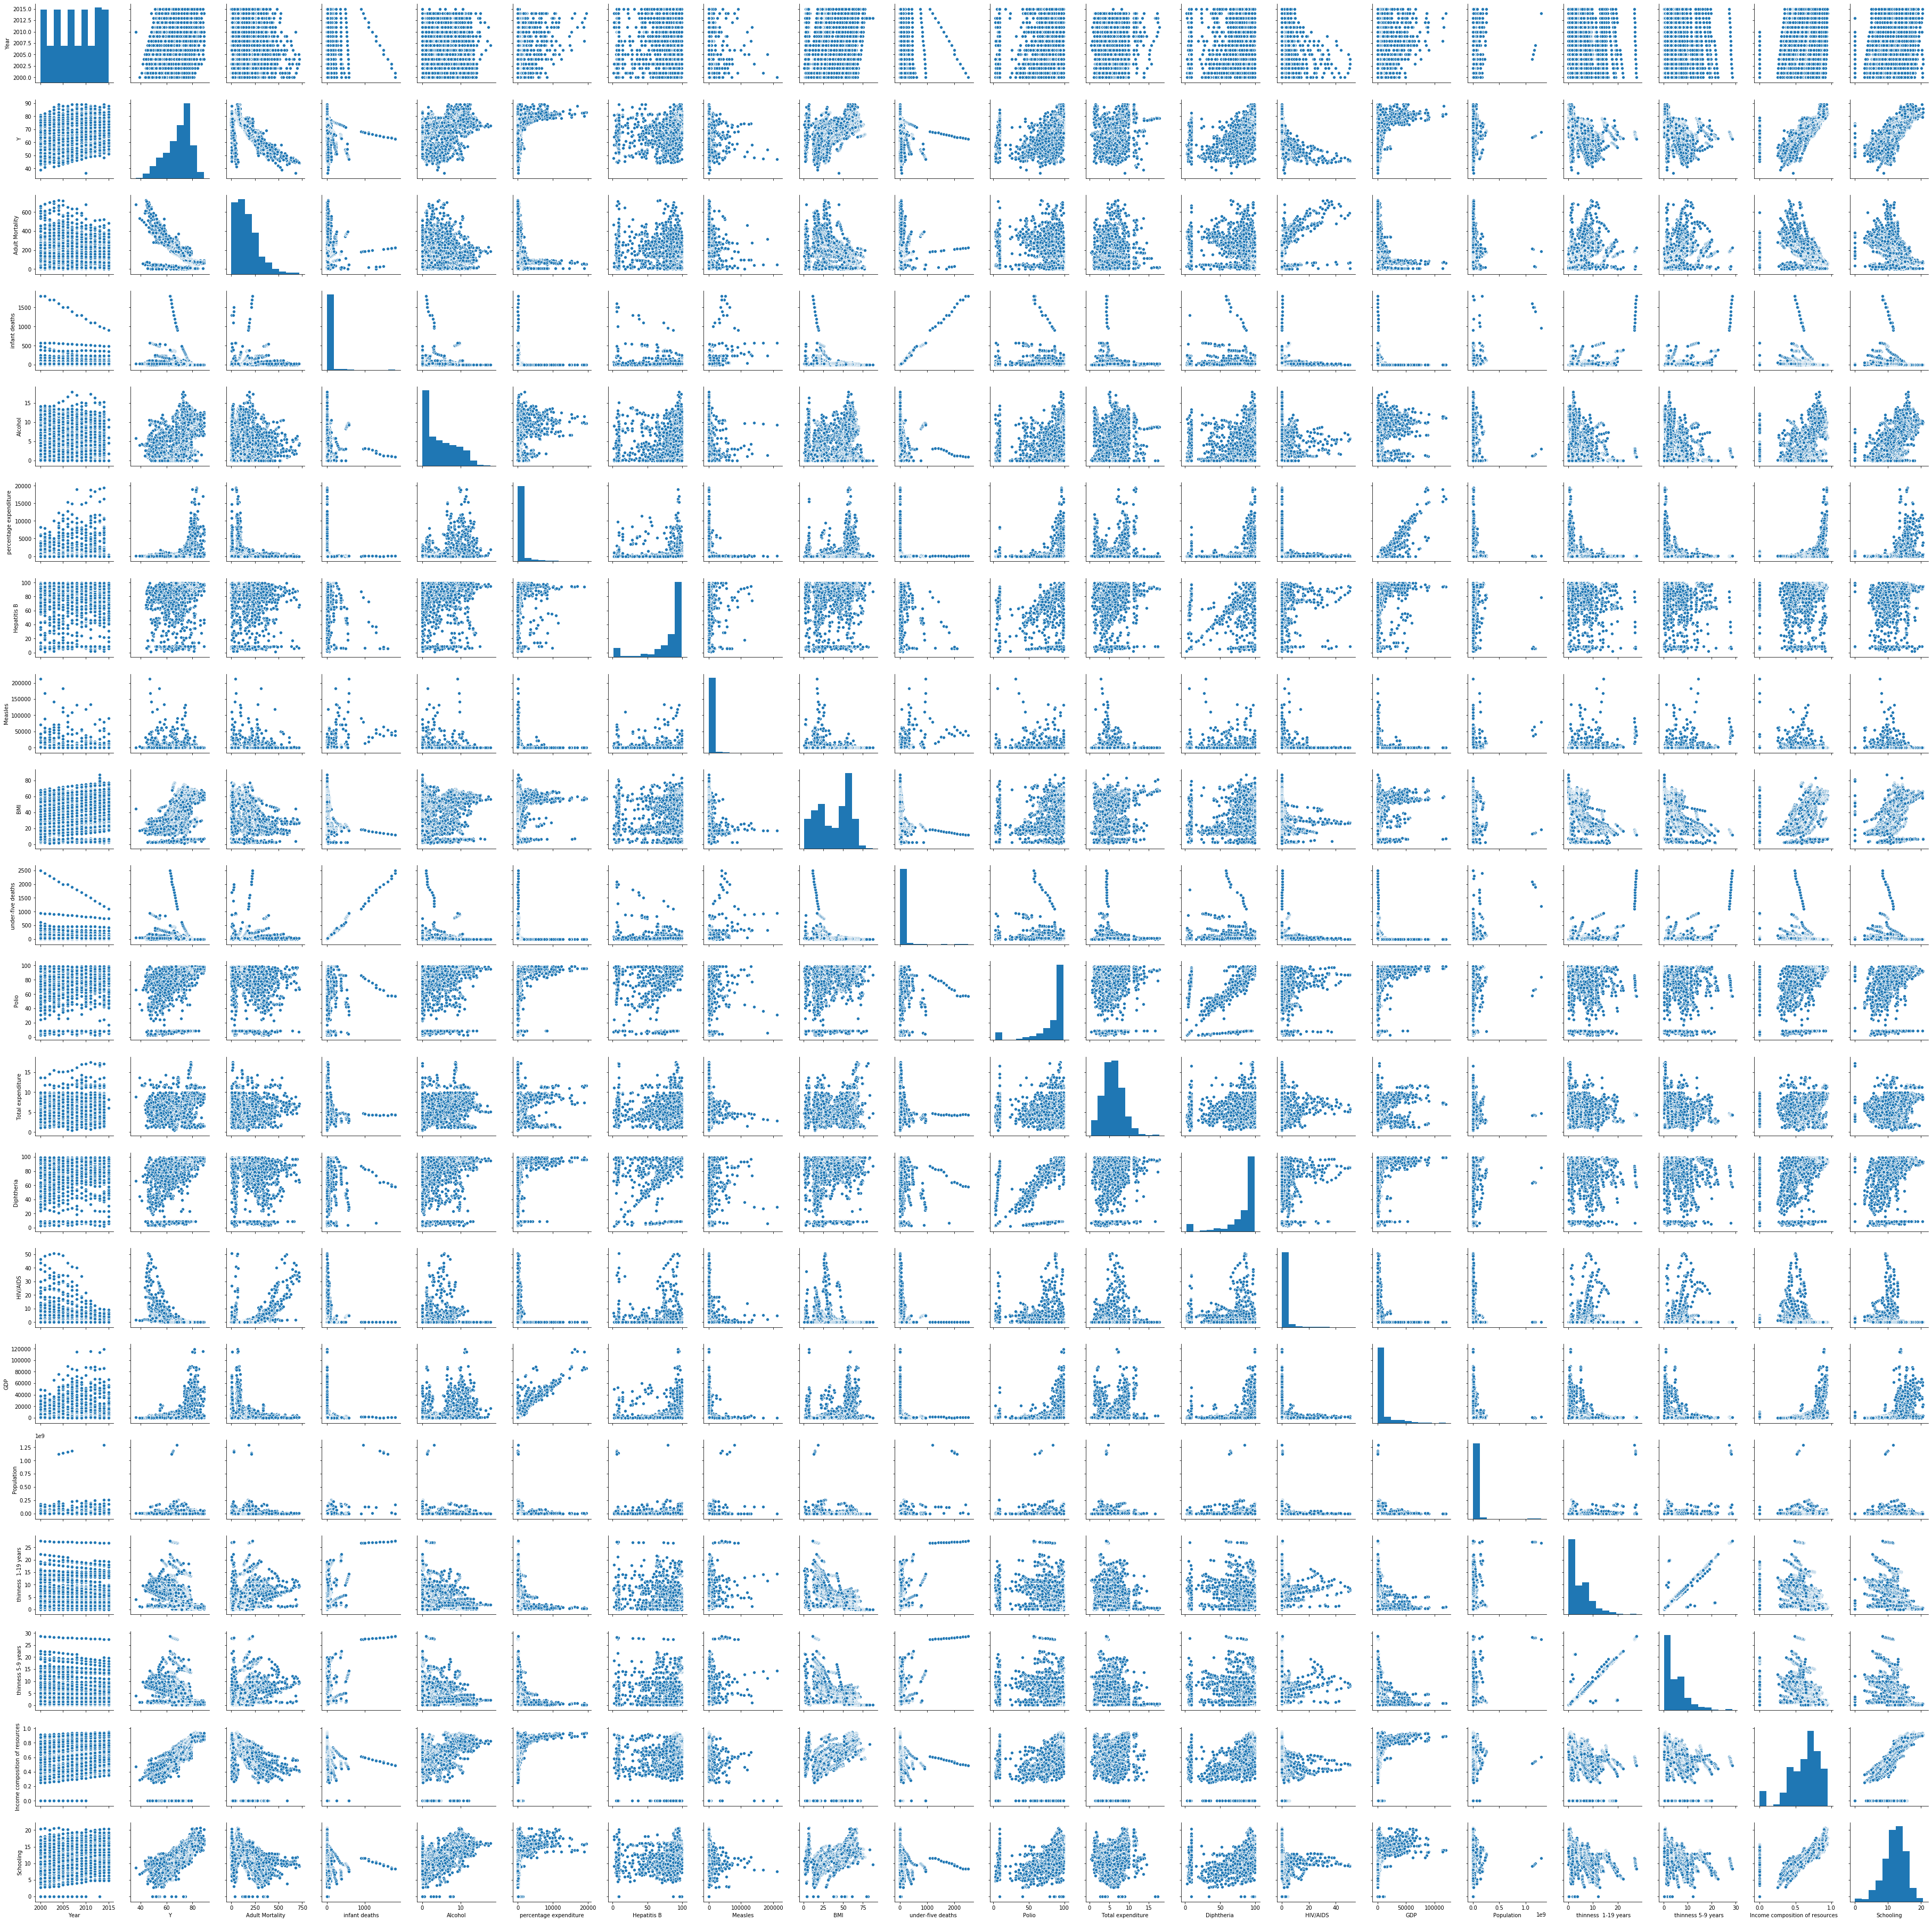

In [104]:
sns.pairplot(df)

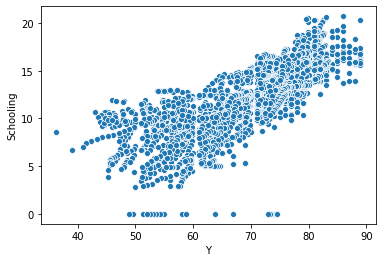

In [243]:
sns.scatterplot('Y','Schooling',data=df)

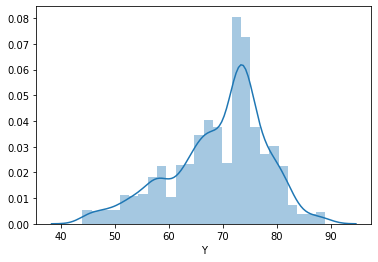

In [68]:
#sns.distplot(df['Y'])

In [301]:
df.columns

Index(['Country', 'Year', 'Status', 'Y', 'Adult Mortality', 'infant deaths',
       'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles', ' BMI ',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

In [302]:
df1=df.drop(['Country','infant deaths','percentage expenditure', 'Hepatitis B', 'Measles','under-five deaths ', 'Polio', 'Total expenditure',' HIV/AIDS',
            'Population', ' thinness  1-19 years',
       ' thinness 5-9 years'],axis=1)

In [303]:
df1.columns

Index(['Year', 'Status', 'Y', 'Adult Mortality', 'Alcohol', ' BMI ',
       'Diphtheria ', 'GDP', 'Income composition of resources', 'Schooling'],
      dtype='object')

In [304]:
df1.dropna(subset = ['Year', 'Status', 'Y', 'Adult Mortality', 'Alcohol', ' BMI ',
       'Diphtheria ', 'GDP', 'Income composition of resources', 'Schooling'], inplace=True)

In [305]:
df1=df1.reset_index(drop=True)

In [306]:
df1.describe(include='all')

Year      Status            Y  Adult Mortality      Alcohol  \
count   2200.000000        2200  2200.000000      2200.000000  2200.000000   
unique          NaN           2          NaN              NaN          NaN   
top             NaN  Developing          NaN              NaN          NaN   
freq            NaN        1777          NaN              NaN          NaN   
mean    2007.210000         NaN    69.559045       160.367727     4.680509   
std        4.289065         NaN     9.718501       128.653519     4.057162   
min     2000.000000         NaN    36.300000         1.000000     0.010000   
25%     2004.000000         NaN    63.500000        69.000000     0.927500   
50%     2007.000000         NaN    72.500000       135.000000     4.055000   
75%     2011.000000         NaN    76.100000       221.000000     7.670000   
max     2015.000000         NaN    89.000000       723.000000    17.870000   

               BMI   Diphtheria             GDP  \
count   2200.000000  2200.000000    2200.000000   
unique          NaN          NaN            NaN   
top             NaN          NaN            NaN   
freq            NaN          NaN            NaN   
mean      38.497727    83.097727    7877.540395   
std       19.798171    22.833362   14812.501318   
min        1.400000     2.000000       1.681350   
25%       19.475000    81.000000     464.218481   
50%       44.400000    93.000000    1841.086830   
75%       56.125000    97.000000    6359.415575   
max       77.100000    99.000000  119172.741800   

        Income composition of resources    Schooling  
count                       2200.000000  2200.000000  
unique                              NaN          NaN  
top                                 NaN          NaN  
freq                                NaN          NaN  
mean                           0.660818    12.270000  
std                            0.166944     3.186234  
min                            0.253000     2.800000  
25%                            0.520000    10.300000  
50%                            0.693000    12.500000  
75%                            0.792000    14.500000  
max                            0.948000    20.700000

In [307]:
df1=pd.get_dummies(df1,drop_first=True)

In [308]:
df1=df1.reset_index(drop=True)

In [309]:
X=df1.drop(['Y'],axis=1)
y=df1['Y']


In [310]:
from sklearn.model_selection import train_test_split

In [311]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.2, random_state=42)

In [312]:
X_train.fillna(X_train.mean())
y_train.fillna(y_train.mean())

1656    76.6
752     85.0
892     72.9
1041    71.9
1179    81.4
        ... 
1638    79.3
1095    73.2
1130    44.5
1294    62.0
860     61.1
Name: Y, Length: 1760, dtype: float64

In [204]:
#y_train.fillna(y_train.mean())

In [254]:
#from sklearn.preprocessing import StandardScaler


In [255]:
#scaler=StandardScaler()

In [256]:
#scaler.fit(X_train)

StandardScaler()

In [262]:
#X_train=scaler.transform(X_train)

In [258]:
#X_test=scaler.transform(X_test)

In [313]:
from sklearn.linear_model import LinearRegression

In [314]:
reg=LinearRegression()

In [315]:
reg.fit(X_train,y_train)

LinearRegression()

In [317]:
prediction=reg.predict(X_test)

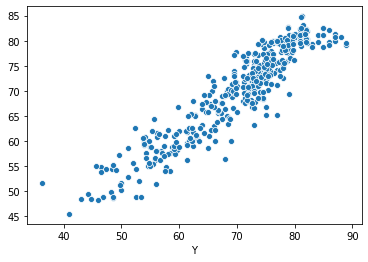

In [320]:
sns.scatterplot(y_test,prediction)

In [321]:
output=pd.DataFrame(y_test)

In [327]:
output.reset_index(drop=True)
output['prediction']=prediction
output['residual']=output['Y']-output['prediction']

In [328]:
output

Y  prediction  residual
1451  79.9   80.065679 -0.165679
1334  65.9   71.973299 -6.073299
1761  65.0   58.568888  6.431112
1735  63.1   60.613124  2.486876
1576  73.4   72.927537  0.472463
...    ...         ...       ...
59    46.5   53.936367 -7.436367
71    76.2   76.396021 -0.196021
1908  69.8   70.585671 -0.785671
1958  73.7   68.545724  5.154276
482   62.9   61.305301  1.594699

[440 rows x 3 columns]

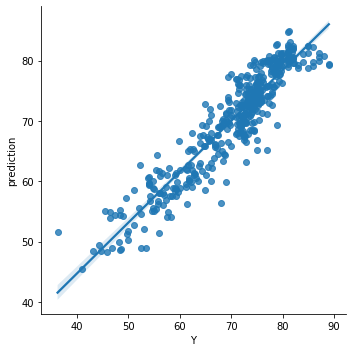

In [329]:
sns.lmplot('Y','prediction',data=output)

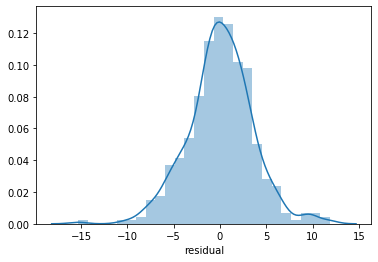

In [332]:
sns.distplot(output['residual'])

In [333]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [334]:
MSE=mean_squared_error(output['Y'],output['prediction'])

In [335]:
MAE=mean_absolute_error(output['Y'],output['prediction'])

In [336]:
MSE

12.409691599068186

In [337]:
MAE

2.6659966329439024

In [344]:
testing=df1[5:6]

In [345]:
testing

Year     Y  Adult Mortality  Alcohol   BMI   Diphtheria         GDP  \
5  2010  58.8            279.0     0.01   16.7         66.0  553.32894   

   Income composition of resources  Schooling  Status_Developing  
5                            0.448        9.2                  1

In [347]:
X_for_test=X[5:6]

In [348]:
X_for_test

Year  Adult Mortality  Alcohol   BMI   Diphtheria         GDP  \
5  2010            279.0     0.01   16.7         66.0  553.32894   

   Income composition of resources  Schooling  Status_Developing  
5                            0.448        9.2                  1

In [349]:
y_for_test_predicted=reg.predict(X_for_test)

In [350]:
y_for_test_predicted

array([58.38473693])